In [1]:
from robust_motifs.data import import_connectivity_matrix, save_count_graph_from_matrix, MPDataManager
from pathlib import Path

In [12]:
from robust_motifs.counting import get_n_extended_simplices_dense, count_bisimplices_dense

In [3]:
import multiprocessing as mp

In [4]:
import time

In [5]:
from tqdm import tqdm

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import gc

In [9]:
pool = mp.Pool()

  0%|          | 0/6 [00:00<?, ?it/s]

3001770


 17%|█▋        | 1/6 [02:58<14:50, 178.03s/it]

3443834


 33%|███▎      | 2/6 [38:49<51:20, 770.01s/it]

484346


 50%|█████     | 3/6 [1:12:59<57:42, 1154.15s/it]

11474


 83%|████████▎ | 5/6 [1:17:28<10:22, 622.63s/it] 

36


100%|██████████| 6/6 [1:17:30<00:00, 775.03s/it]

0


<BarContainer object of 6 artists>

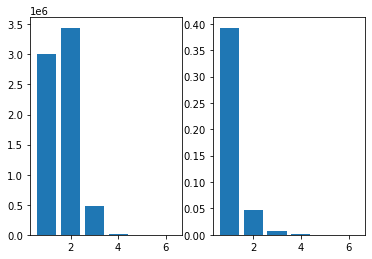

In [10]:
matrix = import_connectivity_matrix(dataframe = False, type = 'csr')
save_path = Path("data/counting/full/full.flag")
manager = MPDataManager(save_path, matrix)
results = []
simplices = []
for dimension in tqdm(range(1,7)):
    try:
        iterator = manager.mp_np_simplex_iterator_dense(dimension = dimension, random = False)
        r = pool.imap(count_bisimplices_dense, iterator, chunksize=1000)
        count = 0
        for element in r:
            count += element
        print(count)
        results.append(count)
    except Exception as e:
        results.append(0)
        print(e)
    try:
        simplices.append(len(manager._count_file['Cells_' + str(dimension)]))
    except:
        simplices.append(0)
    manager._shut_shared_memory()
    del iterator
fig, axes = plt.subplots(1,2)
axes[0].bar(range(1,7),results)
axes[1].bar(range(1,7),np.array(results)/np.array(simplices))

100%|██████████| 6/6 [40:39<00:00, 406.59s/it]


<BarContainer object of 6 artists>

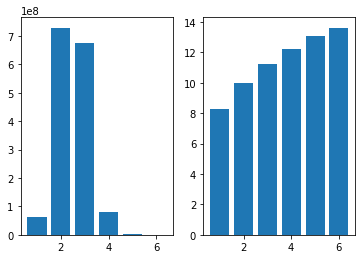

In [13]:
matrix = import_connectivity_matrix(dataframe = False, type = 'csr')
save_path = Path("data/counting/full/full.flag")
manager = MPDataManager(save_path, matrix)
results = []
simplices = []
for dimension in tqdm(range(1,7)):
    try:
        iterator = manager.mp_np_simplex_iterator_dense(dimension = dimension, random = False)
        r = pool.imap(get_n_extended_simplices_dense, iterator, chunksize=1000)
        count = 0
        for element in r:
            count += element
        results.append(count)
    except Exception as e:
        results.append(0)
        print(e)
    try:
        simplices.append(len(manager._count_file['Cells_' + str(dimension)]))
    except:
        simplices.append(0)
    manager._shut_shared_memory()
    del iterator
fig, axes = plt.subplots(1,2)
axes[0].bar(range(1,7),results)
axes[1].bar(range(1,7),np.array(results)/np.array(simplices))

In [15]:
fig.savefig("es_count_whole")